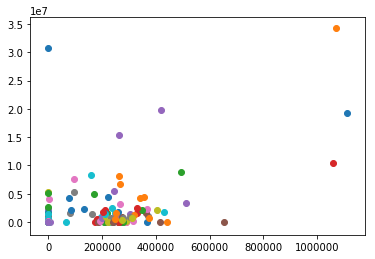

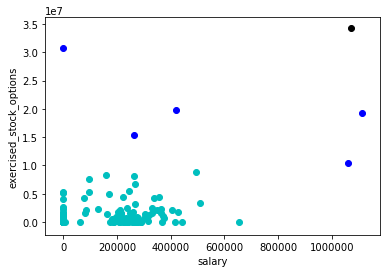

In [1]:
import pickle
import numpy
import matplotlib.pyplot as plt
#import sys
#sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
%matplotlib inline



def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, _ in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn import cluster
clf = cluster.KMeans(n_clusters=3)
pred = clf.fit_predict(finance_features)

### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters3.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

In [3]:
data_dict

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 'NaN'

In [4]:
type(finance_features)

list

In [5]:
finance_features

[array([  365788.,        0.,  1061827.]),
 array([  267102.,  6680544.,  5634343.]),
 array([  170941.,  4890344.,   211725.]),
 array([      0.,  651850.,       0.]),
 array([  243293.,  5538001.,   288682.]),
 array([ 267093.,       0.,  628522.]),
 array([       0.,   493489.,  1848227.]),
 array([  370448.,  1104054.,  4099771.]),
 array([       0.,  5210569.,  3131860.]),
 array([  197091.,   880290.,  1737629.]),
 array([  130724.,  2282768.,  3100224.]),
 array([  288589.,        0.,  1130461.]),
 array([  248546.,   765313.,  2014835.]),
 array([  257486.,        0.,  1545059.]),
 array([       0.,  2218275.,   966522.]),
 array([      0.,  372205.,       0.]),
 array([  288542.,        0.,  1490344.]),
 array([  251654.,  1056320.,  3202070.]),
 array([ 288558.,  185063.,  551174.]),
 array([  63744.,       0.,  762135.]),
 array([       0.,  1030329.,    87410.]),
 array([  357091.,  4346544.,  1798780.]),
 array([  271442.,    81042.,  3471141.]),
 array([      0.,    3285.

In [6]:
import pandas as pd

In [8]:
df = pd.DataFrame(finance_features, columns=['salary', 'exercised_stock_options', 'total_payments'])
df.head()

,salary,exercised_stock_options,total_payments
0,365788.0,0.0,1061827.0
1,267102.0,6680544.0,5634343.0
2,170941.0,4890344.0,211725.0
3,0.0,651850.0,0.0
4,243293.0,5538001.0,288682.0


In [10]:
df.exercised_stock_options.describe()

count    1.390000e+02
mean     2.150471e+06
std      4.865021e+06
min      0.000000e+00
25%      0.000000e+00
50%      6.518500e+05
75%      1.741654e+06
max      3.434838e+07
Name: exercised_stock_options, dtype: float64

In [12]:
df[df.exercised_stock_options > 0].describe()

,salary,exercised_stock_options,total_payments
count,1.010000e+02,1.010000e+02,1.010000e+02
mean,2.087125e+05,2.959559e+06,2.894694e+06
std,2.129918e+05,5.499450e+06,1.050042e+07
min,0.000000e+00,3.285000e+03,0.000000e+00
25%,0.000000e+00,5.067650e+05,1.824660e+05
50%,2.139990e+05,1.297049e+06,1.092663e+06
75%,2.751010e+05,2.542813e+06,2.101364e+06
max,1.111258e+06,3.434838e+07,1.035598e+08


In [13]:
df[df.salary > 0].describe()

,salary,exercised_stock_options,total_payments
count,9.400000e+01,9.400000e+01,9.400000e+01
mean,2.840875e+05,2.540065e+06,3.194386e+06
std,1.771311e+05,4.948872e+06,1.073273e+07
min,4.770000e+02,0.000000e+00,1.115290e+05
25%,2.118020e+05,2.023300e+04,9.033020e+05
50%,2.587410e+05,9.102735e+05,1.398577e+06
75%,3.086065e+05,2.253369e+06,2.410100e+06
max,1.111258e+06,3.434838e+07,1.035598e+08
